#Ejercicio

Hacer un gráfico que muestre como los diferentes optimizadores encuentran mínimos en la siguiente función:

$$F(x,y) = x^2 + 4xy + 100y^2 - 4y + 20x + 4$$

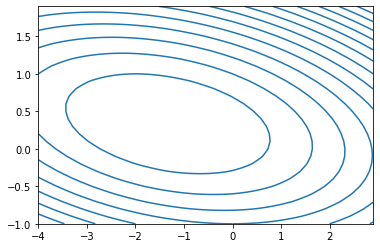

In [3]:
import torch
import matplotlib.pyplot as plt

# funcion objetivo a minimizar
# minimo en (-4/3, 1/3)
def func(x,y):
  return x ** 2 + 2 * x * y + 10 * y ** 2 + 2 * x - 4 * y + 4

## Usar los siguientes optimizadores:
#SGD, Adagrad, RMSprop, Adam
# guardarlos en una lista

opt = []

results = [[]]
for i in range(len(opt)): #recorremos nuetros optimizacores
  pass
  # TODO
  # Inicializar a en (-4,1)
  # guardar los valores
  # inicial el optimizador
  for e in range(20):
    pass
    # TODO
    # ejecutar la optimización
    # guardar cada nuevo valor de parametros
  #graficar

## Codigo adicional para mostrar curvas de nivel
x, y = torch.meshgrid(torch.arange(-4.0, 3.0, 0.1),
                      torch.arange(-1.0, 2.0, 0.1))
levels = torch.arange(2, 80.0, 4).detach()
plt.contour(x, y, func(x, y), levels = levels,colors='#1f77b4')

## Solución

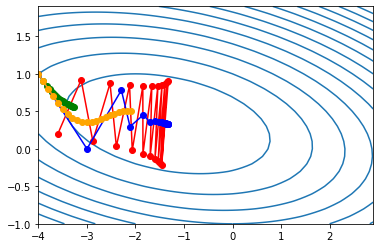

In [4]:
import torch
import matplotlib.pyplot as plt

def func(x,y):
  return x ** 2 + 2 * x * y + 10 * y ** 2 + 2 * x - 4 * y + 4


opt = [torch.optim.SGD,
       torch.optim.Adagrad,
       torch.optim.RMSprop,
       torch.optim.Adam]
colors = ['red','green','blue','orange']
"""
opt = [torch.optim.Adadelta]
colors = ['orange']
"""

results = [[]]
for i in range(len(opt)):
  a = torch.tensor([-4.0,1.0], requires_grad=True)
  results.append([(float(a[0]),float(a[1]))])
  trainer = opt[i]([a], lr=0.1)
  for e in range(20):
    loss = func(a[0],a[1])
    trainer.zero_grad()
    loss.backward()
    trainer.step()
    results[i].append((float(a[0]),float(a[1])))
  plt.plot(*zip(*results[i]), '-o', color=colors[i])

x, y = torch.meshgrid(torch.arange(-4.0, 3.0, 0.1),
                      torch.arange(-1.0, 2.0, 0.1))
levels = torch.arange(2, 80.0, 4).detach()
plt.contour(x, y, func(x, y), levels = levels,colors='#1f77b4')